In [120]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

from LinearRegression import plotRegression
%matplotlib inline
from sklearn import linear_model

In [175]:
# experiment_data = pandas.read_excel("data/expSet.xlsx")
# evaluation_set = pandas.read_excel("data/evalSet.xlsx")

EXPERIMENT_DATA = pickle.load(open('EXPERIMENT_SET_pandas.pkl', 'rb'))
EVALUATION_SET = pickle.load(open('EVALUATION_SET_pandas.pkl', 'rb'))

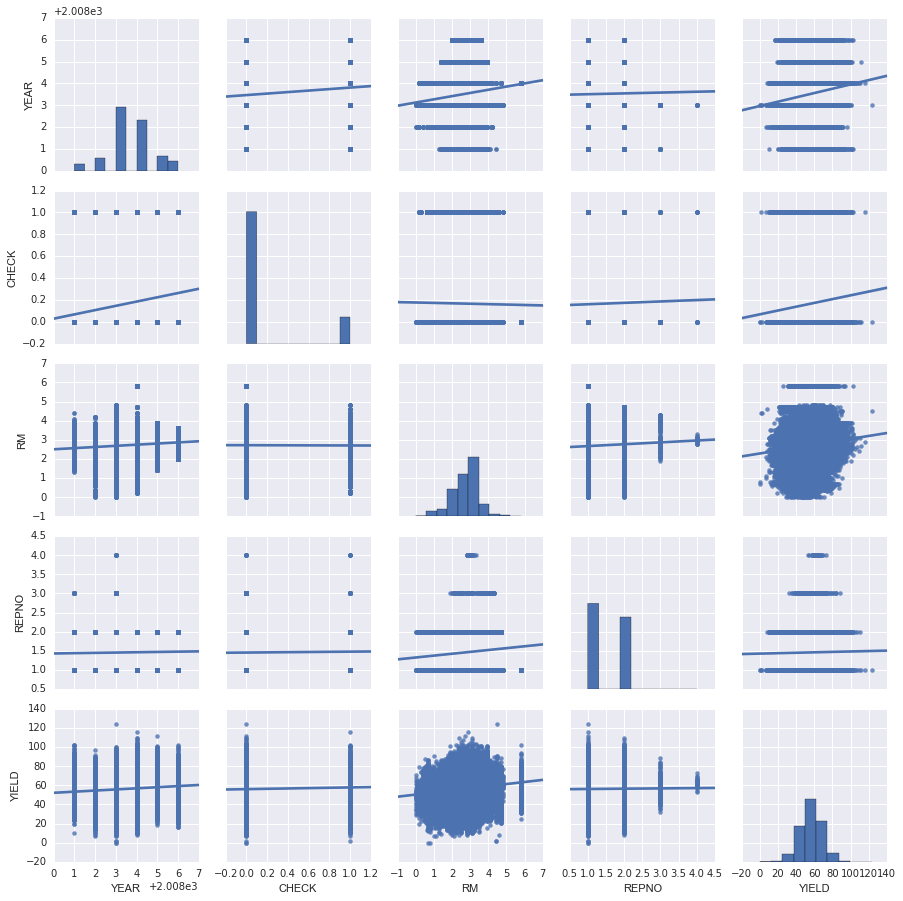

In [179]:
sns_plot = sns.pairplot(EXPERIMENT_DATA, palette="muted", kind="reg")
sns_plot.savefig("compareNumberLabels.png")

In [ ]:
modded = EXPERIMENT_DATA
modded["LOCATION"].isnull().values.any()

In [173]:
modded = EXPERIMENT_DATA
modded["LOCATION"] = modded["LOCATION"].apply(pd.to_numeric, args=('coerce',))
modded["BAGSOLD"] = modded["BAGSOLD"].apply(pd.to_numeric, args=('coerce',))
modded["CLASS_OF"] = modded["CLASS_OF"].apply(pd.to_numeric, args=('coerce',))

In [169]:
graduated = EXPERIMENT_DATA[EXPERIMENT_DATA["GRAD"] == "YES"]
graduated.head()

,YEAR,EXPERIMENT,LOCATION,VARIETY,FAMILY,CHECK,RM,REPNO,YIELD,CLASS_OF,GRAD,BAGSOLD
1379,2009,09YT000395,1110.0,V148493,FAM07635,False,2.1,1,61.924294,2011,YES,61161
1380,2009,09YT000395,1110.0,V148493,FAM07635,False,2.1,2,66.942631,2011,YES,61161
1415,2009,09YT000395,1220.0,V148493,FAM07635,False,2.1,1,54.956200,2011,YES,61161
1416,2009,09YT000395,1220.0,V148493,FAM07635,False,2.1,2,55.158432,2011,YES,61161
1451,2009,09YT000395,1241.0,V148493,FAM07635,False,2.1,1,50.418908,2011,YES,61161


In [111]:
print("Experiment_Data values {}\n".format(EXPERIMENT_DATA.columns.values))
print("Evaluation_Set values {}".format(EVALUATION_SET.columns.values))

Experiment_Data values ['YEAR' 'EXPERIMENT' 'LOCATION' 'VARIETY' 'FAMILY' 'CHECK' 'RM' 'REPNO'
 'YIELD' 'CLASS_OF' 'GRAD' 'BAGSOLD']

Evaluation_Set values ['CLASS_OF' 'VARIETY' 'FAMILY' 'RM']


In [112]:
print("Shape of Experiment data: {}\nShape of Evaluation Set:{}"
      .format(experiment_data.shape, evaluation_set.shape))

Shape of Experiment data: (258253, 12)
Shape of Evaluation Set:(38, 4)


In [113]:
EXPERIMENT_DATA.head()

,YEAR,EXPERIMENT,LOCATION,VARIETY,FAMILY,CHECK,RM,REPNO,YIELD,CLASS_OF,GRAD,BAGSOLD
0,2009,09YT000052,3210,V000016,FAM05619,True,3.9,1,50.302327,.,.,.
1,2009,09YT000052,3210,V000016,FAM05619,True,3.9,2,48.331305,.,.,.
2,2009,09YT000052,3210,V000018,FAM05619,True,3.7,1,53.103246,.,.,.
3,2009,09YT000052,3210,V000018,FAM05619,True,3.7,2,53.103246,.,.,.
4,2009,09YT000052,3210,V000039,FAM05625,True,3.4,1,58.081136,.,.,.


In [158]:
print("The number of unique locations that we have is {}."
      .format(len(set(EXPERIMENT_DATA['LOCATION']))))
print("The number of unique yields that we have is {}."
      .format(len(set(np.floor(EXPERIMENT_DATA['YIELD'])))))
print("The number of unique families is {}."
      .format(len(set(EXPERIMENT_DATA['YIELD']))))
print("The number of unique varieties is {}."
      .format(len(set(EXPERIMENT_DATA['VARIETY']))))

The number of unique locations that we have is 221.
The number of unique yields that we have is 107.
The number of unique families is 44851.
The number of unique varieties is 15632.


In [115]:
from sklearn.neighbors import KNeighborsRegressor
X = pd.to_numeric(graduated['LOCATION']).reshape(-1,1)
Y = graduated['YIELD']
knn = KNeighborsRegressor(n_neighbors=100)
knn.fit(X, Y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=100, p=2,
          weights='uniform')

In [116]:
predictions = knn.predict(X)

In [117]:
print("Mean Squared Error is: {} ".format(np.sum((predictions - Y)**2)/ len(Y)))

Mean Squared Error is: 100.06027816663513 


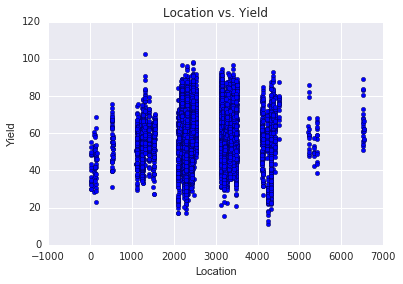

In [121]:
plt.xlabel("Location")
plt.ylabel("Yield")
plt.title("Location vs. Yield")
plt.scatter(X, Y)



In [131]:
def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);

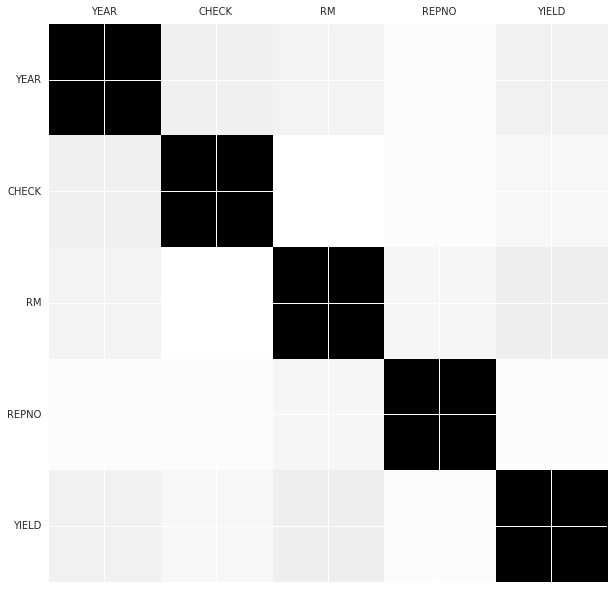

In [137]:
plot_corr(experiment_data)